## Part 1
The following model is given:

\begin{eqnarray}
A & \sim & \mathcal{N}(A;0, 1.2) \\
R & \sim & \mathcal{IG}(R;0.4, 250) \\
x_{k}|x_{k-1}, A, R & \sim & \mathcal{N}(x_{k};Ax_{k-1}, R) \\
x_0 = 1 && x_1 = -6
\end{eqnarray}

1\. Direct graphical model and the factor graph

<img src="fig1.png" style="width: 250px;">

<img src="fig2.png" style="width: 400px;">

2\. a) Write the expression for the full joint posterior distribution.

The exact joint posterior distribution can be computed up to a normalization factor as follows:

$$ 
\phi = p(A, R, x_1 =  \hat x_1 | x_0 = \hat x_0) \propto p(x_1|x_0, A, R)p(A)p(R) = \mathcal{N}(x_{1};Ax_{0}, R) \mathcal{N}(A;0, P) 
\mathcal{IG}(R;\nu, \nu/\beta) \\
\propto exp\Big(-\frac{1}{2}\frac{x_{1}^2}{R} + x_0x_1\frac{A}{R} -\frac{1}{2}\frac{x_{0}^2A^2}{R}-\frac{1}{2}\text{log}2 \pi R\Big) exp\Big(-\frac{1}{2}\frac{A^2}{P} -\frac{1}{2}\text{log}|2 \pi P|\Big) exp\Big(-(\nu+1)\text{log}R - \frac{\nu}{\beta} \frac{1}{R} -\text{log}\Gamma(\nu)+\nu\text{log}(\nu/\beta)\Big) 
$$

2\. b) Assign terms to the individual factors on the factor graph:

$$
\text{log}\phi(A, R) = -\frac{1}{2}\frac{x_{1}^2}{R} + x_0x_1\frac{A}{R} -\frac{1}{2}\frac{x_{0}^2A^2}{R}-\frac{1}{2}\text{log}2 \pi R -\frac{1}{2}\frac{A^2}{P} -\frac{1}{2}\text{log}|2 \pi P| -(\nu+1)\text{log}R - \frac{\nu}{\beta} \frac{1}{R} -\text{log}\Gamma(\nu)+\nu\text{log}(\nu/\beta) \\
=+ -\frac{1}{2}\frac{x_{1}^2}{R} + x_0x_1\frac{A}{R} -\frac{1}{2}\frac{x_{0}^2A^2}{R}-\frac{1}{2}\text{log}R -\frac{1}{2}\frac{A^2}{P} -(\nu + 1)\text{log}R - \frac{\nu}{\beta} \frac{1}{R} \\
q(A) = exp\Big(-\frac{1}{2}\frac{A^2}{P}\Big) \\
q(R) = exp\Big( -(\nu+1+1/2)\text{log}R- \Big(\frac{nu}{\beta} + \frac{1}{2}x_1^2+ \Big) \frac{1}{R} \Big) \\
q(x_0, x_1) = exp\Big( x_0x_1\frac{A}{R} - \frac{1}{2} \frac{x_0^2A^2}{R} \Big)
$$

3\. Derive the full conditional distributions for the parameters A, and R.

Let $Y$ denote the observed data, and $\theta$ the model parameters that we are asked to infer. The logarithm of the marginal likelihood can be computed as follows:

\begin{eqnarray}
\text{log}(Y) &= \int q(\theta \ |Y)\text{log}p(Y)d\theta \\
&= \int q(\theta \ |Y)\text{log}\frac{p(Y, \theta)}{p(\theta|Y)}d\theta\\
&= \int q(\theta \ |Y)\text{log}\frac{p(Y, \theta)}{p(\theta \ |Y)}\frac{q(\theta \ |Y)}{q(\theta \ |Y)}d\theta\\
&= \text{Free Energy + KL Divergence} \\
\end{eqnarray}

Where $q(\theta \ |Y)$ is an arbitrary probability density, which will be the approximation to the true posterior distribution of the parameters.

$$ 
\text{Free Energy} = \int q(\theta \ |Y)\text{log}\frac{p(Y, \theta)}{q(\theta \ |Y)}d\theta 
$$
and
$$
\text{KL Divergence} = KL(q||p) = \int q(\theta \ |Y)\text{log}\frac{q(\theta \ |Y)}{p(\theta \ |Y)}d\theta 
$$

The second term, KL divergence between the true posterior density and the approximation, is always positive. Thus, the Free Energy term can be thought of as a "lower bound" on the marginal likelihood. If the approximation of the true posterior is exact, then the KL divergence term becomes zero, and the marginal likelikehood is equal to this lower bound.

The true joint posterior distribution can be approximated with a factorized distribution as follows:

$$
q(\theta \ |Y) = \prod_{i=1}^{P} q(\theta_i \ |Y) \\
$$
Where $P$ is the total number of parameters in the model.

For this example, $ p(A|R, x_0, x_1) $ and $ p(R|A, x_0, x_1)$ will have the following form:

\begin{eqnarray}
Q&= q(A)q(R) \\
q(A) &= \mathcal{N}(A;m, \Sigma)\\
q(R) &= \mathcal{IG}(R;a, b)
\end{eqnarray}

And the sufficient statistics for both distributions can be computed as:

$$
E\{A\} = m \\
E\{A^2\} = \Sigma + m^2 \\
A^* = m\\
E\{1/R\} = a/b \\
E\{\text{log}R\} = \text{log}(b) - \Psi(a) \\ R^* = b/(a+1)
$$


$$
\text{log}\phi = -\frac{1}{2}\frac{x_{1}^2}{R} + x_0x_1\frac{A}{R} -\frac{1}{2}\frac{x_{0}^2A^2}{R}-\frac{1}{2}\text{log}2 \pi R -\frac{1}{2}\frac{A^2}{P} -\frac{1}{2}\text{log}|2 \pi P| -(\nu+1)\text{log}R - \frac{\nu}{\beta} \frac{1}{R} -\text{log}\Gamma(\nu)+\nu\text{log}(\nu/\beta) \\
=+ -\frac{1}{2}\frac{x_{1}^2}{R} + x_0x_1\frac{A}{R} -\frac{1}{2}\frac{x_{0}^2A^2}{R}-\frac{1}{2}\text{log}R -\frac{1}{2}\frac{A^2}{P} -(\nu+1)\text{log}R - \frac{\nu}{\beta} \frac{1}{R} \\[0.5in]
$$ 

$$
KL(q||p) = \int q(\theta \ |Y)\text{log}\frac{q(\theta \ |Y)}{p(\theta \ |Y)}d\theta \\
= E\Big\{\text{log} \frac{q(\theta \ |Y)}{p(\theta \ |Y)}\Big\}_{q} \\
= E\{ \text{log}q(\theta \ |Y)\}_{q} - E\{\text{log}p(\theta \ |Y)\}_{q} \\
= E\{ \text{log}q(\theta \ |Y)\}_{q} - E\{\text{log}p(\theta,Y)\}_{q} + E\{\text{log}p(Y)\}_{q} \\
= -(E\{\text{log}p(\theta,Y)\}_{q} - E\{ \text{log}q(\theta \ |Y)\}_{q}) + E\{\text{log}p(Y)\}_{q} \\
= -  \text{Free Energy} + \text{log}p(Y)\\
$$

Where, the final term $E\{\text{log}p(Y)\}_{q}$ is independent of q, and hence minimizing the KL divergence is equivalent to maximizing the lower bound, i.e. free energy. Let $\mathcal{L}(\theta)$ denote the lower bound, which is the objective function of the maximization problem, it can be decomposed as follows:

$$
\mathcal{L}(\theta) = \int q(\theta \ |Y)\text{log}\frac{p(Y, \theta)}{q(\theta \ |Y)}d\theta \\
= \int q(\theta \ |Y)\text{log}\frac{p(Y, \theta)}d\theta  + \int q(\theta \ |Y)\text{log}\frac{1}{q(\theta \ |Y)}d\theta \\
= \int q_j(\theta_j \ |Y) \underbrace{[\text{log}p(Y, \theta)\prod_{i\neq j}q_i(\theta_i \ |Y)d\theta_i]}_{E\{ \text{log}p(Y, \theta)\}_{i \neq j}} d\theta_j + \sum_{i}\int q_i(\theta_i \ |Y)\text{log}\frac{1}{q(\theta_i \ |Y)}d\theta_i
$$

Keeping $q_{i \neq j}$ constant and maximizing $\mathcal{L}(\theta)$, the following expression is obtained for each parameter:

$$
q_j(\theta_j) = \frac {E\{ \text{log}p(Y, \theta)\}_{i \neq j}} {\int E\{ \text{log}p(Y, \theta)\}_{i \neq j}d|theta_j}
$$

And for this example, the optimum densities for parameters $A$ and $R$ can be computed using the following expressions: 

$$
q(A) \propto exp(E\{\text{log}\phi(A,R)\}_{q(R)}) = exp\Big(-\frac{1}{2}\frac{A^2}{P} + E\{ x_0x_1\frac{A}{R} -\frac{1}{2}\frac{x_{0}^2A^2}{R}\}_{q(R)} \Big) \\
= exp\Big(-\frac{1}{2} \Big( \frac{1}{P} + x_0^2E\Big\{ \frac{1}{R}\Big\}_{q(R)}A^2 + x_0x_1E\Big\{ \frac{1}{R}\Big\}_{q(R)}A\Big) \\
\Sigma = \Big(\frac{1}{R}+x_0^2E\Big\{ \frac{1}{R}\Big\}_{q(R)} \Big)^{-1} = \Big(\frac{1}{R}+x_0^2 \frac{a}{b} \Big)^{-1} \\
= \Sigma x_0x_1E\Big\{ \frac{1}{R}\Big\}_{q(R)} = \Sigma x_0x_1\frac{a}{b} \\[0.5in]
q(R) \propto exp(E\{\text{log}\phi(A,R)\}_{q(A)}) = exp\Big( -(\nu+1+1/2)\text{log}R- \Big(\frac{nu}{\beta} + \frac{1}{2}x_1^2+ E\Big\{ -x_0x_1A + \frac{1}{2}x_0^2A^2 \Big\}_{q(A)} \Big) \frac{1}{R} \Big) \\
= exp\Big( -(\nu+1+1/2)\text{log}R- \Big(\frac{nu}{\beta} + \frac{1}{2}x_1^2+ -x_0x_1E\{A\}_{q(A)} + \frac{1}{2}x_0^2E\{A^2\}_{q(A)} \Big) \frac{1}{R} \Big) \\
a = \nu + 1/2 \\
b = \frac{\nu}{\beta}+ \frac{1}{2}x_1^2-x_0x_1E\{A\}_{q(A)}+\frac{1}{2}x_0^2E\{A^2\}_{q(A)} = \frac{\nu}{\beta}+ \frac{1}{2}x_1^2-x_0x_1m+\frac{1}{2}x_0^2(m^2 + \Sigma \\[0.5in]
$$

The following algorithm can be used to find the factors for both $A$ and $R$:

$$
for \ t = 1, 2, ... T \\
q(A)^{(t)} = exp\Big(E\{ \text{log}\phi(A,R)\}_{q(R)^{t-1}}\Big) \\
q(R)^{(t)} = exp\Big(E\{ \text{log}\phi(A,R)\}_{q(A)^{t}}\Big)
$$

It should be noted that the variational approach maximizes the joint posterior density, and not the individual densities. 

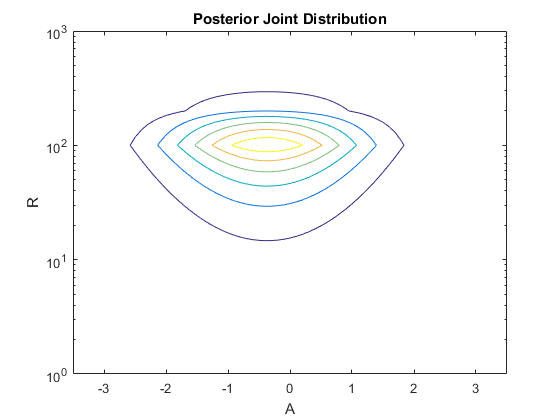

In [10]:
nu = 0.4; beta = 100; P = 1.2; 
x_0 = 1; x_1 = -6;
maxits = 100; expA = -6; expA2 = expA^2; expinvR = 1e5;

for i = 2:maxits
    Sigma = 1/(1/P + x_0^2*expinvR);
    mu    = Sigma*x_0*x_1*expinvR;
    expA  = mu;
    expA2 = mu^2 + Sigma;
    
    a = nu + 0.5;
    b = 0.5*(x_1^2 - 2*x_1*x_0*expA + x_0.^2*expA2) + nu/beta;
    
    expinvR = a/b;
end

invgam = @(x, a, b) b^a/gamma(a).*(1./x).^(a + 1).*exp(-b./x);
[xR, xA] = meshgrid(1e-8:100:1e6, -8:1e-1:6);
qR = invgam(xR, a, b);
qR = qR./sum(sum(qR));
qA = normpdf(xA, mu, Sigma);
qA = qA./sum(sum(qA));
Q  = qA.*qR;
contour(xA, xR, Q)
set(gca, 'YScale', 'log')
xlabel('A')
ylabel('R')
title('Posterior Joint Distribution')
xlim([-3.5 3.5])
ylim([1 1e3])

## Part 2
The following model is given:

\begin{eqnarray}
A & \sim & \mathcal{N}(A;0, P) \\
R & \sim & \mathcal{IG}(R;\nu, \nu/\beta) \\
x_{k}|x_{k-1}, A, R & \sim & \mathcal{N}(x_{k};Ax_{k-1}, R) \\
x_0 = 1 && x_1 = -6
\end{eqnarray}

The hyperparameters are given as follows:
\begin{eqnarray}
\nu = 0.4 && \beta = 100 && P = 1.2 \\
x_0 = 1 && x_1 = -6
\end{eqnarray}

1. Derive and implement an EM algorithm to find the MAP estimate 
$ R^* = \underset {R} {\text{argmax}} \ p(R|x_0, x_1, \theta) $ 

2. Derive and implement an EM algorithm to find the MAP estimate 
$ A^* = \underset {A} {\text{argmax}} \ p(A|x_0, x_1, \theta) $ 

3. Derive and implement an ICM (iterative conditional modes) algorithm to find
$ (R^*, A^*) = \underset {A, R} {\text{argmax}} \ p(A, R|x_0, x_1, \theta) $ 

The unnormalized posterior is: 

$$ \phi \ \propto \ exp\Big(-(\nu +1) \text{log}R \frac{\nu}{\beta} \frac{1}{R} -\text{log}\Gamma(\nu) 
 \nu \text{log} (\nu/\beta)\Big) $$
 
And the marginal log-likelihood
$$ \text{log}Z = \text{log}p(x_1 = \hat x_1, x_0 = \hat x_0, \theta) $$
is lower bounded by
$$ \mathcal{B}_{VB} = \langle \text{log}\phi\rangle_Q + H[Q] $$

where

$$ Q = q(A)q(R) $$
$$ q(A) = \mathcal{N}(A;m, \Sigma)$$
$$ q(R) = \mathcal{IG}(R;a, b)$$
